In [24]:
import datetime
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

import misc
importlib.reload(misc)

<module 'misc' from '/Users/K/works/git/active-target-volatility-strategy/misc.py'>

In [25]:
price_ticker = "^SPX"
vix_ticker = "^VIX6M"
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime("%Y-%m-%d")

df = yf.download([price_ticker, vix_ticker], start=start_date, end=end_date)["Close"]
days = df.index.values
prices = df[price_ticker].values
vix = df[vix_ticker].values / 100

[*********************100%***********************]  2 of 2 completed


In [26]:
import misc
importlib.reload(misc)

model = misc.ATVS(prices, vix)

In [27]:
S_static, x_static = model.run(active=False)
S_active, x_active = model.run(active=True, both=False)
S_active2, x_active2 = model.run(active=True, both=True)

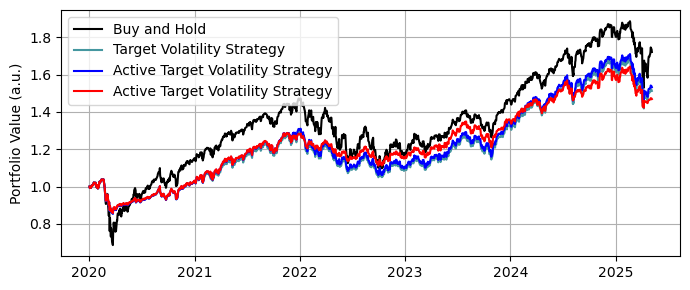

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
ax.plot(days, prices/prices[0], color="black", label="Buy and Hold")
ax.plot(days, S_static, color="#4597A0", label="Target Volatility Strategy")
ax.plot(days, S_active, color="blue", label="Active Target Volatility Strategy")
ax.plot(days, S_active2, color="red", label="Active Target Volatility Strategy")
ax.set_ylabel("Portfolio Value (a.u.)")
ax.legend()
ax.grid()
plt.show()

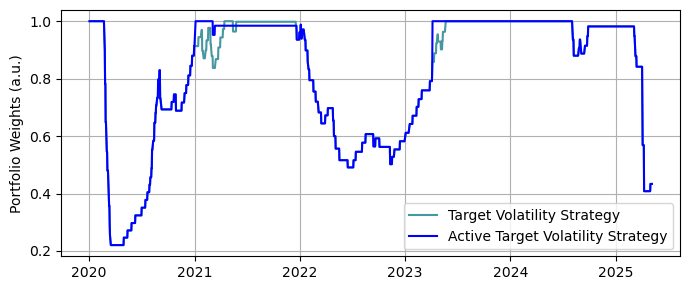

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
ax.plot(days, x_static, color="#4597A0", label="Target Volatility Strategy")
ax.plot(days, x_active, color="blue", label="Active Target Volatility Strategy")
ax.set_ylabel("Portfolio Weights (a.u.)")
ax.legend()
ax.grid()
plt.show()

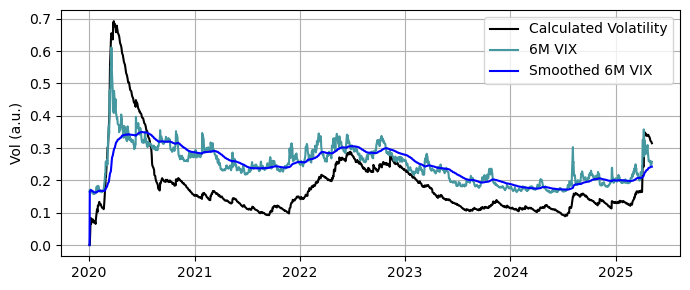

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3), tight_layout=True)
ax.plot(days, model.vol, color="black", label="Calculated Volatility")
ax.plot(days, vix, color="#4597A0", label="6M VIX")
ax.plot(days, model.smoothed_vix, color="blue", label="Smoothed 6M VIX")
ax.set_ylabel("Vol (a.u.)")
ax.legend()
ax.grid()
plt.show()

In [23]:
def mean_variance(S):
    rets = np.diff(S) / S[:-1]
    annualized_rets = 100 * np.mean(rets) * 252
    annualized_risk = 100 * np.std(rets, ddof=1) * np.sqrt(252)
    return annualized_rets, annualized_risk

def sharpe_ratio(S):
    rets = np.diff(S) / S[:-1]
    annualized_rets = 100 * np.mean(rets) * 252
    annualized_risk = 100 * np.std(rets, ddof=1) * np.sqrt(252)
    sr = annualized_rets / annualized_risk
    return sr

print(sharpe_ratio(prices))
print(sharpe_ratio(S_static))
print(sharpe_ratio(S_active))    

0.5769936042941143
0.6321746841786839
0.6475049034188876
